<a href="https://colab.research.google.com/github/becharar1/idmc/blob/main/tripadvisor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET PYTHON
**Auteurs**

  ***Mohamed Chouki Benkadja***

  ***Rami Bechara***

# Table des matières

* Introduction
* Importation et nettoyage des donnée
* Analyse descriptive des variables
* Clustering K-Means et hierarchical
* Classificattion multi-classe
* Prédiction
* Conclusion

# Introduction 

Nous sommes une société externe travaillant pour une agence de voyage qui veut lancer une campagne publicitaire pour des voyages en Asie de l’Est. Pour cela, elle se base sur des données provenant de médias sociaux.

La société nous a ainsi fourni une base de données avec des informations relatives à des scores d’utilisateurs Trip Advisor, un site web offrant un retour d’expérience de consommateurs sur des sites religieux, restaurants, parcs, plages, etc.

Le but de notre travail est d’extraire de la connaissance de ces données, notamment par une segmentation des utilisateurs. Cette connaissance sera utilisée pour proposer des nouvelles destinations à des utilisateurs ciblés, afin de vendre.

Dans ce rapport, nous allons détailler la procédure qui nous a permis d’obtenir ce résultat. Elle s’est divisée comme suit: Extraction et nettoyage des données, analyse exploratoire, visualisation, clustering et classification des utilisateurs, prédiction et enfin un bilan.



**Imporation des librairies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn  as sns
from matplotlib import pyplot as plt
import graphviz

**Importation et visualisation de la base de données:** 

Le dataset était relativement simple à importer.
La première étape consistait à lire le csv à l'aide de pandas.
La deuxième étape consistait à définir les noms de colonne conformément à la source de donnée UCI. 




User ID  Category 1  Category 2  Category 3  Category 4  Category 5  \
0      User 1        0.93        1.80        2.29        0.62        0.80   
1      User 2        1.02        2.20        2.66        0.64        1.42   
2      User 3        1.22        0.80        0.54        0.53        0.24   
3      User 4        0.45        1.80        0.29        0.57        0.46   
4      User 5        0.51        1.20        1.18        0.57        1.54   
..        ...         ...         ...         ...         ...         ...   
975  User 976        0.74        1.12        0.30        0.53        0.88   
976  User 977        1.25        0.92        1.12        0.38        0.78   
977  User 978        0.61        1.32        0.67        0.43        1.30   
978  User 979        0.93        0.20        0.13        0.43        0.30   
979  User 980        0.93        0.56        1.13        0.51        1.34   

     Category 6  Category 7  Category 8  Category 9  Category 10  
0          2.42        3.19        2.79        1.82         2.42  
1          3.18        3.21        2.63        1.86         2.32  
2          1.54        3.18        2.80        1.31         2.50  
3          1.52        3.18        2.96        1.57         2.86  
4          2.02        3.18        2.78        1.18         2.54  
..          ...         ...         ...         ...          ...  
975        1.38        3.17        2.78        0.99         3.20  
976        1.68        3.18        2.79        1.34         2.80  
977        1.78        3.17        2.81        1.34         3.02  
978        0.40        3.18        2.98        1.12         2.46  
979        2.36        3.18        2.87        1.34         2.40  

[980 rows x 11 columns]

**Donner des noms parlants aux colonnes**

Code source: https://fr.acervolima.com/python-modifier-les-noms-de-colonnes-et-les-index-de-lignes-dans-pandas-dataframe/#:~:text=Afin%20de%20changer%20les%20noms%20de%20colonne%2C%20nous,%C3%A9galement%20une%20liste%20python%20df.index%3D%20%5B%27row1%27%2C%20%27row2%27%2C%20%27row3%27%2C......%5D.




In [ ]:
df0.columns = ['User ID','art galleries','dance clubs','juice bars','restaurants','museums','resorts',
              'parks/picnic spots', 'beaches', 'theaters', 'religious institutions']

**Normalisation**

Nous avons ensuite procédé à la normalisation du DataFrame afin d'éviter tout problème d'unités. Comme tous les avis étaient entre 0 et 4 nous avons procédés à diviser par 4.
Titles représente les colonnes qui ne sont pas des colonnes ID, donc celles qui ont des scores allant de 0 à 4

In [ ]:
def normalize(df,list):
  df1=df.copy()
  for i in range(len(list)):
    df1[list[i]] = (df[list[i]]) / 4
  return df1
titles=['art galleries','dance clubs','juice bars','restaurants','museums','resorts','parks/picnic spots', 'beaches', 'theaters', 'religious institutions']
print(df0)
df=normalize(df0,titles)
print(df)

      User ID  art galleries  dance clubs  juice bars  restaurants  museums  \
0      User 1           0.93         1.80        2.29         0.62     0.80   
1      User 2           1.02         2.20        2.66         0.64     1.42   
2      User 3           1.22         0.80        0.54         0.53     0.24   
3      User 4           0.45         1.80        0.29         0.57     0.46   
4      User 5           0.51         1.20        1.18         0.57     1.54   
..        ...            ...          ...         ...          ...      ...   
975  User 976           0.74         1.12        0.30         0.53     0.88   
976  User 977           1.25         0.92        1.12         0.38     0.78   
977  User 978           0.61         1.32        0.67         0.43     1.30   
978  User 979           0.93         0.20        0.13         0.43     0.30   
979  User 980           0.93         0.56        1.13         0.51     1.34   

     resorts  parks/picnic spots  beaches  theaters

In [ ]:
df.shape

(980, 11)

980 lignes et 11 colonnes 

# Nettoyage des données
Nettoyage de la catégorie ID
Vérification des valeurs nulles

In [ ]:
dfclean=df.drop(columns=["User ID"]);
dfclean.columns = titles

In [ ]:
dfclean.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   art galleries           980 non-null    float64
 1   dance clubs             980 non-null    float64
 2   juice bars              980 non-null    float64
 3   restaurants             980 non-null    float64
 4   museums                 980 non-null    float64
 5   resorts                 980 non-null    float64
 6   parks/picnic spots      980 non-null    float64
 7   beaches                 980 non-null    float64
 8   theaters                980 non-null    float64
 9   religious institutions  980 non-null    float64
dtypes: float64(10)
memory usage: 76.7 KB


In [ ]:
df.isnull().sum()

User ID                   0
art galleries             0
dance clubs               0
juice bars                0
restaurants               0
museums                   0
resorts                   0
parks/picnic spots        0
beaches                   0
theaters                  0
religious institutions    0
dtype: int64

Nous remarquons qu'aucune colonne a des valeurs nulls ou NA

# Analyse descriptive des variables
**Notes moyennes par catégorie** 


Sur notre dataset les avis des utilisateurs sur les destinations dans les 10 catégories mentionnées à travers l'Asie de l'Est sont pris en compte.

Nous avons d'abord examiné les données et essayé de montrer les différences entre les  catégories

In [ ]:
df.describe()

art galleries  dance clubs  juice bars  restaurants     museums  \
count     980.000000   980.000000  980.000000   980.000000  980.000000   
mean        0.223298     0.338153    0.253327     0.133125    0.234934   
std         0.081728     0.119570    0.197152     0.069933    0.109357   
min         0.085000     0.000000    0.032500     0.037500    0.015000   
25%         0.167500     0.270000    0.067500     0.102500    0.160000   
50%         0.207500     0.320000    0.205000     0.125000    0.225000   
75%         0.255000     0.390000    0.393125     0.145000    0.300000   
max         0.805000     0.910000    0.905000     0.860000    0.825000   

          resorts  parks/picnic spots     beaches    theaters  \
count  980.000000          980.000000  980.000000  980.000000   
mean     0.460724            0.795235    0.708765    0.392360   
std      0.134885            0.001956    0.034376    0.091157   
min      0.035000            0.790000    0.605000    0.185000   
25%      0.365000            0.795000    0.685000    0.327500   
50%      0.450000            0.795000    0.705000    0.385000   
75%      0.550000            0.795000    0.727500    0.440000   
max      0.940000            0.802500    0.847500    0.792500   

       religious institutions  
count              980.000000  
mean                 0.699806  
std                  0.080345  
min                  0.535000  
25%                  0.635000  
50%                  0.695000  
75%                  0.760000  
max                  0.915000

Les résultats de la fonction describe indiquent que les gens préfèrent les parks/picnic spots, beaches et religious institutions à l'encontre des restaurants par exemple. Ceci est montré plus pleinement dans le graphe ci-dessous

**Classez les catégories par moyenne la plus élevée:**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


parks/picnic spots        0.80
beaches                   0.71
religious institutions    0.70
resorts                   0.46
theaters                  0.39
dance clubs               0.34
juice bars                0.25
museums                   0.23
art galleries             0.22
restaurants               0.13
dtype: float64


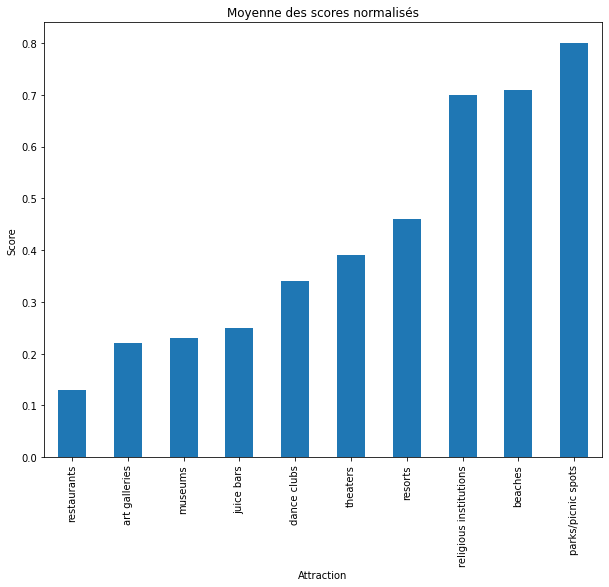

In [ ]:
df_moyen = df.mean(axis=0).round(2).sort_values()
print(df_moyen.sort_values(ascending = False))
df_moyen.plot.bar()
plt.title("Moyenne des scores normalisés")
plt.xlabel("Attraction")
plt.ylabel("Score")
graph1 = graphviz.Source(plt, format="png")

À partir de ce graphique, nous pouvons voir que les parcs et les plages ont la note moyenne la plus élevée, ainsi que les institutions religieuses.




Classement pour chaque catégorie. Comment on interprète ce graphe?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


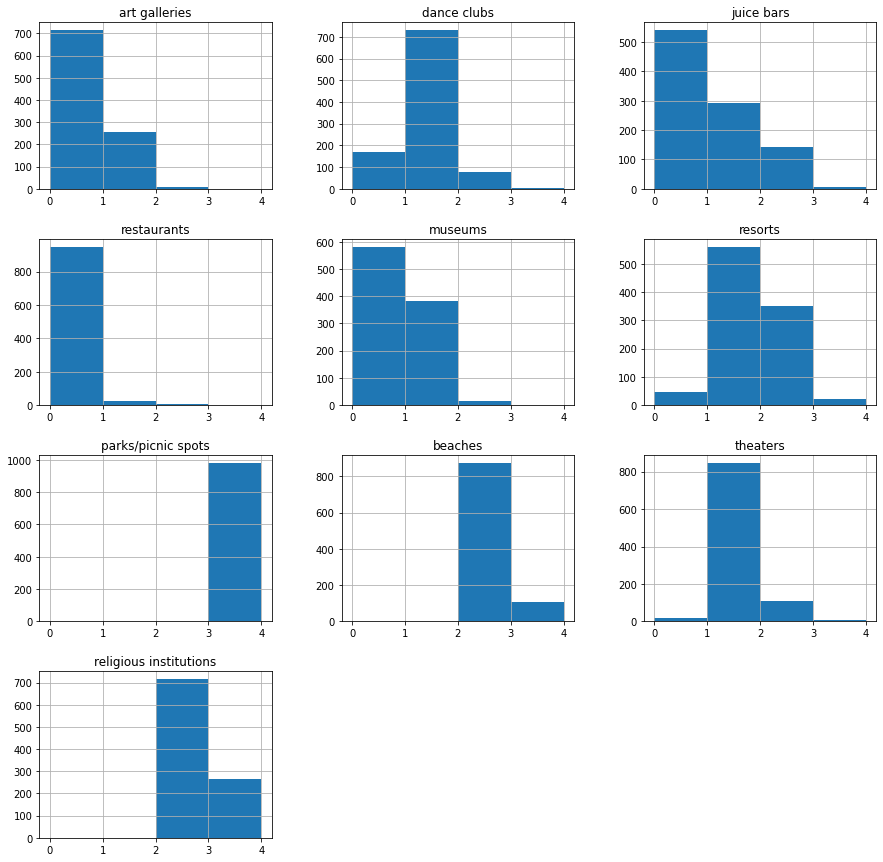

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df0.hist(ax=ax, bins=[0, 1, 2, 3, 4])

plt.show()
graph2 = graphviz.Source(plt.figure, format="png")

**PCA: réduction des dimensions**


# PCA

L'ACP est une technique de réduction des dimensions importante dans l'analyse multi-variable.
Elle peut être utilisée pour réduire les variables avant un ML. L'idée est de diminuer le nombre de variables tout en gardant 95-99% de l'information initiale.

In [ ]:
x = df.loc[:,titles ].values
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)


[0.29775044 0.42402984 0.54733977 0.65378681 0.75576877 0.83656694
 0.9070124  0.95301127 0.98589969 1.        ]


Text(0.5, 1.0, "Evolution de l'information avec nombre de variables")

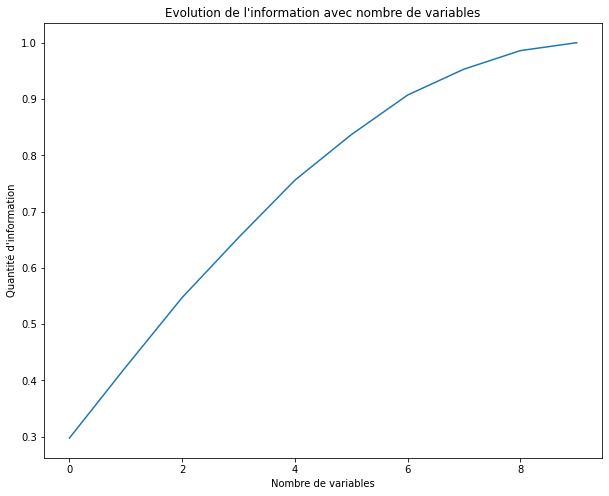

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Nombre de variables")
plt.ylabel("Quantité d'information")
plt.title ("Evolution de l'information avec nombre de variables")

Nous remarquons que 8 variables sur 10 donnent plus de 95% de l'information. Ceci peut être lié à restaurants que tout le monde n'aime pas et parks l'inverse.
Cependant, pour le reste du travail, nous avons décidé de travailler avec les variables initiales

**Matrice de corrélation** 

code source : https://www.delftstack.com/fr

In [ ]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

NameError: ignored

La corrélation varie entre -1 et 1. La diagonale est remplie de 1 parceque ce sont les variables contre elle-même. La partie droite de la diagonale est égale à la partie gauche
On voit qu'il y a une très faible corrélation entre beaches et resorts. D'après nous, les gens qui ont réservé des resorts vont pas aller aux beaches normalenment.
Il y a par contre une forte corrélation entre juice bars et parks. Ce sont les gens qui aiment la fête.
Compte tenu de cette analyse on peut voir que on a problème de clustering.

# Clustering/Catégorisation
Nous voyons que c'est un problème de catégorisation.
Deux algorithmes ont été étudiés à cet issu: un non hierarchique et un hierarchique
# KMeans
**Le premier est le KMeans:**

  Kmeans est un algorithme de clustering non hierarchique qui regroupe les éléments de la base de données en k groupes selon leur distance à un centroide de chaque groupe. Ce centroide est initialisé aléatoirement et se détermine au fur et à mesure des calculs. Une librairie python existe déjà pour exécuter cet algorithme.

**Analyse des inerties**

Nous avons en premier lieu comparé les inerties obteneues pour 1 à 4 clusters/groupes.
L'inertie est calculée comme la somme des distances  entre chaque point et le centroïde de son groupe. Cette variable diminue en augmentant le nombre d'inerties.
Cette variable est importante pour chercher le clustering idéal

In [ ]:
from sklearn import cluster
km1 = cluster.KMeans(n_clusters=1).fit(dfclean)
print(km1.inertia_)

km2 = cluster.KMeans(n_clusters=2).fit(dfclean)
print(km2.inertia_)

km3 = cluster.KMeans(n_clusters=3).fit(dfclean)
print(km3.inertia_)

km4 = cluster.KMeans(n_clusters=4).fit(dfclean)
print(km4.inertia_)

108.51167589923466
73.73459020486041
65.77424779645823
60.11481880393197


**Choix du meilleur cluster**

Nous remarquons que le plus grand changement d'inertie est observé pour k=2. Nous avons procédé à deux analyses comparatives plus approfondies pour vérifier cela:
* la méthode du coude  
* la silhouette 

***Méthode du Coude***

La méthode de coude cherche le point après lequel la diminution de l'inertie ralentit, formant un coude. *texte en italique*

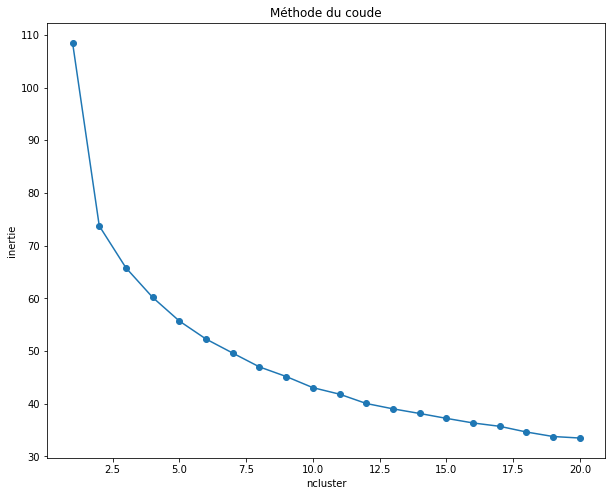

In [ ]:
def plot_coude(df,nmaxcluster):
  inertie=[]
  for k in range(1,nmaxcluster+1):
      resultat=cluster.KMeans(n_clusters=k)
      resultat.fit(df)
      inertiek=resultat.inertia_
      inertie.append(inertiek)
  fig, ax = plt.subplots(1,1)
  ax.plot(range(1,nmaxcluster+1),inertie,'o-')
  ax.set_xlabel('ncluster')
  ax.set_ylabel('inertie')
  ax.set_title("Méthode du coude")
plot_coude(dfclean,20)

Pour notre dataset, le coude semble se situer à ncluster=2. 
Cette méthode est importante mais reste néanmoins visuelle. 
Elle peut être validée par la méthode silhouette

***Méthode de la Silhouette***

La méthode de la silhouette pour un point, silhouette_samples, calcule sa position à l'intérieur de son cluster. Elle varie entre -1 et +1. Une valeur proche de:

*  1 signifie que l’observation est  à l’intérieur de son cluster.
*  0 signifie qu’elle se situe près d’une frontière
* -1 signifie que le point est dans le mauvais cluster. 

Le silhouette_score représente la moyenne de tout silhouette_samples. Le meilleure cluster maximise silhouette_scores

Calcul de silhouette score pour 4 clusters

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
ncl=4
resultat=cluster.KMeans(n_clusters=ncl)
resultat.fit(dfclean)
silhouette_individuelle = silhouette_samples(dfclean,resultat.labels_)
silhouette_individuelle;
silhouette_moyenne = silhouette_score(dfclean,resultat.labels_)
print(silhouette_moyenne)

0.16899844986359616


Nous allons checher visuellement le meilleur nombre de clusters entre 2 et 20 clusters.

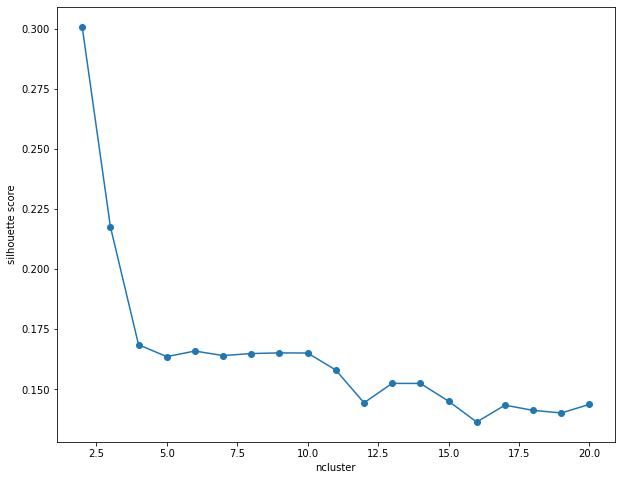

In [ ]:
def plot_silhouette(df,nmaxcluster):
  sil_moy=[]
  for k in range(2,nmaxcluster+1):
      resultat=cluster.KMeans(n_clusters=k)
      resultat.fit(df)
      silhouette_moyenne = silhouette_score(dfclean,resultat.labels_)
      sil_moy.append(silhouette_moyenne)
  fig, ax = plt.subplots(1,1)
  ax.plot(range(2,nmaxcluster+1),sil_moy,'o-')
  ax.set_xlabel('ncluster')
  ax.set_ylabel('silhouette score')
plot_silhouette(dfclean,20)

Le maximum est situé pour ncluster = 2.


**Application du kmeans avec ncluster =2**:


Les deux analyses montrent que la présence de 2 clusters est la meilleure (présence de coude + maximum pour la silhouette).
Nous avons donc procédé à consolider le clustering 2 groupes, générer et comprendre le résultat obtenu.


In [ ]:
resultat=cluster.KMeans(n_clusters=2)
resultat.fit(dfclean)
print(titles)
centers=resultat.cluster_centers_
print(centers)
labels=resultat.labels_

['art galleries', 'dance clubs', 'juice bars', 'restaurants', 'museums', 'resorts', 'parks/picnic spots', 'beaches', 'theaters', 'religious institutions']
[[0.22649869 0.35486911 0.45734948 0.14570026 0.295      0.54589005
  0.79678665 0.70122382 0.38152487 0.65039267]
 [0.22125418 0.32747492 0.12299749 0.12509197 0.19656355 0.40632107
  0.79424331 0.71358278 0.39928094 0.73137124]]


Nous avons cherché à faire une comparaison rapide entre les centroides de chaque cluster. L'idée est que le centroide est représentatif du groupe. Le meilleur était de présenter graphiquement

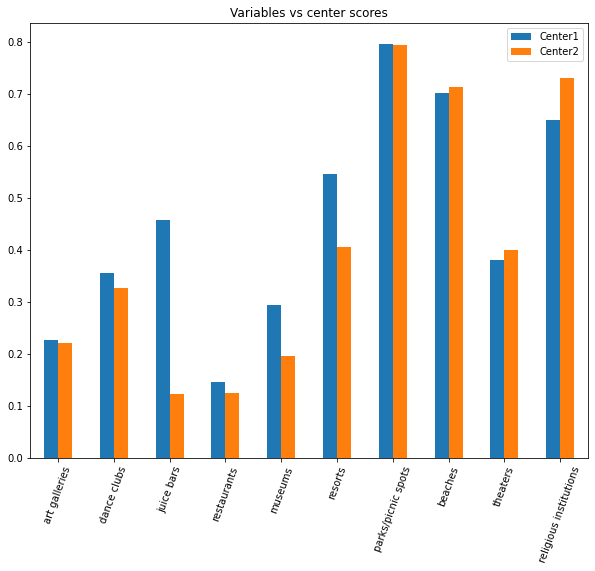

In [ ]:
# Transform centeers into python dictionary
d = {'Center1':centers[0], 'Center2': centers[1]}
# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=d, index=titles);
# Draw a vertical bar chart
dataFrame.plot.bar(rot=70, title="Variables vs center scores");
#Source: https://pythontic.com/pandas/dataframe-plotting/bar%20chart#:~:text=A%20stacked%20bar%20chart%20illustrates%20how%20various%20parts,articles%20sold%20for%20each%20year%20as%20stacked%20bars.

Art galleries, restaurants, parks, theaters ont les même scores.
Dance clubs, religious institutions, beaches sont proches.
La différence est dans juice bars, museums et resorts

Maintenant nous faisons une visualisation plus générale pour toutles les variables

**viZ 1**

Cette fonction dessine les différentes associations de familles de colonnes
Le but est d'identifier les 2 clusters visuellement
et d'identifier les colonnes qui influencent plus le classement

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


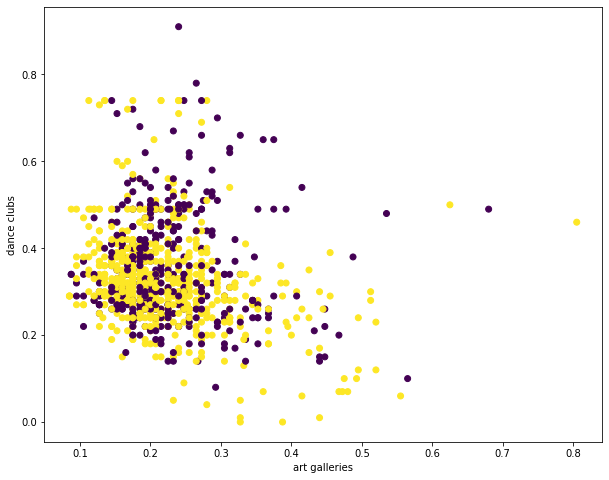

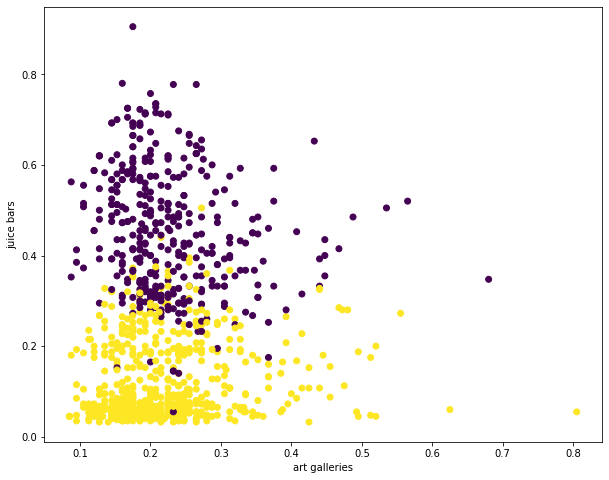

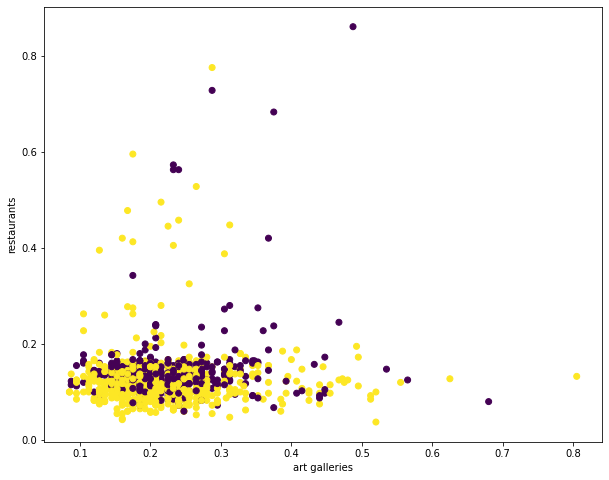

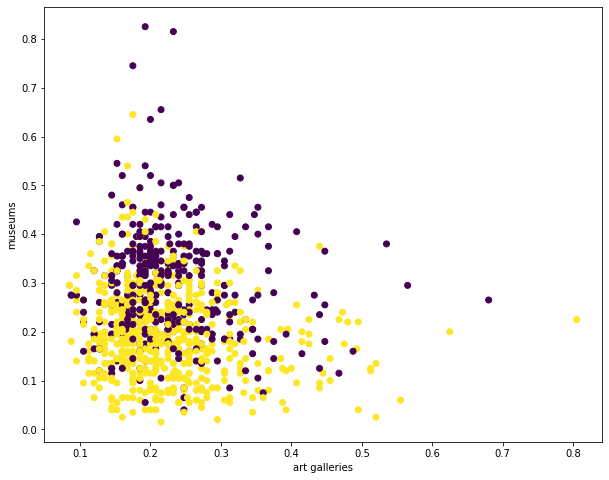

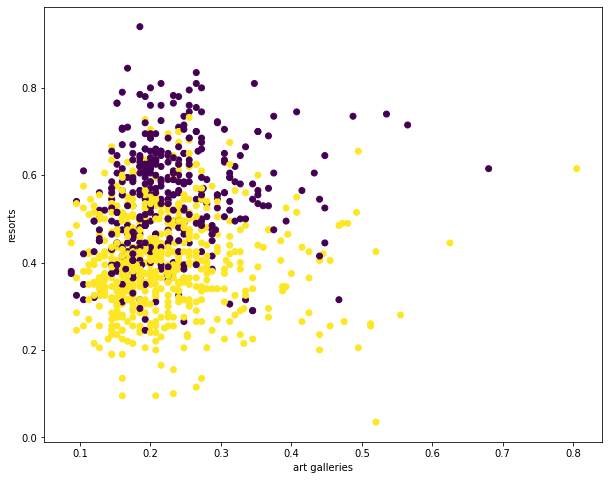

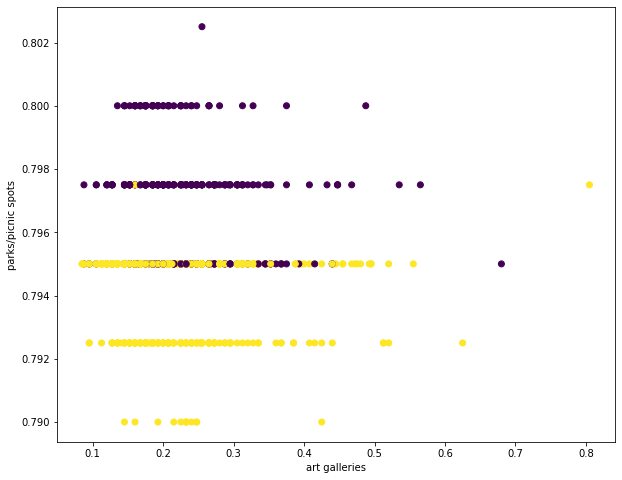

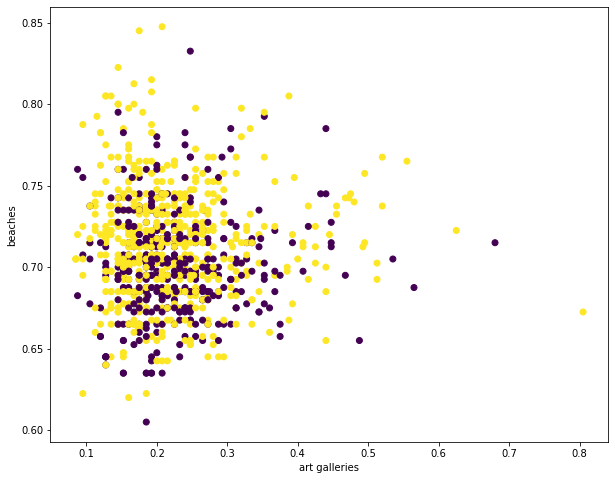

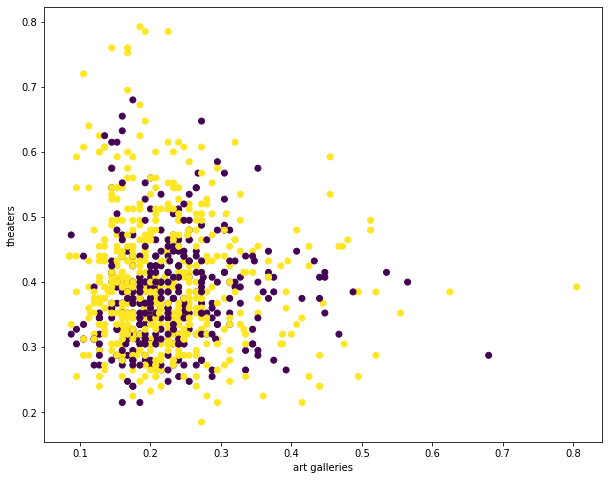

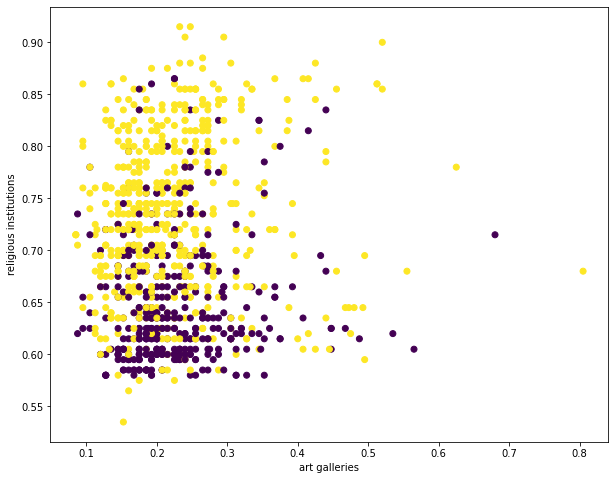

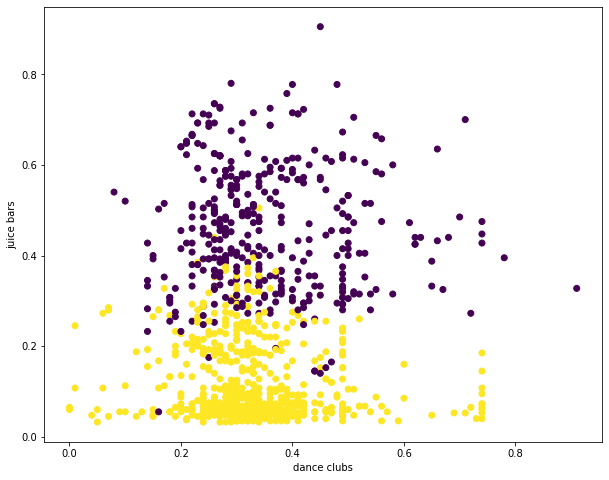

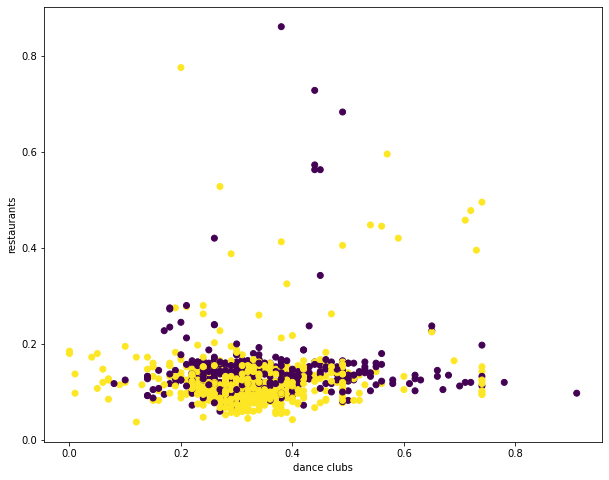

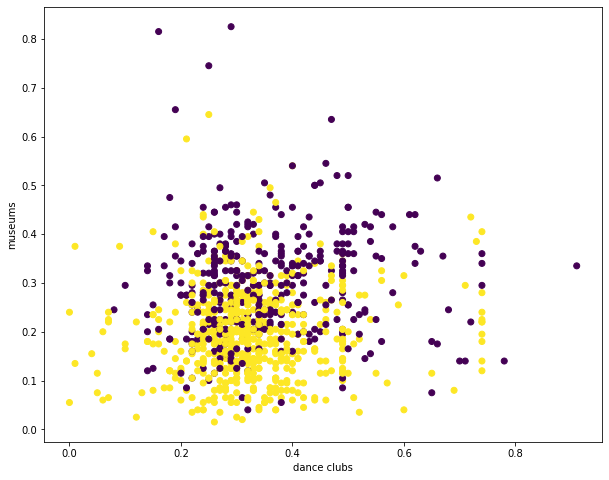

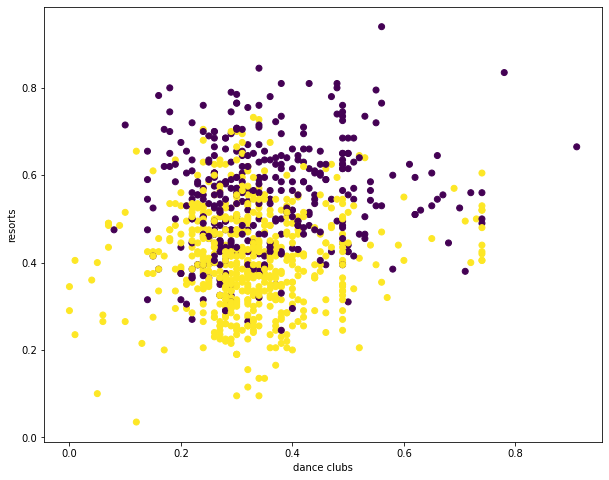

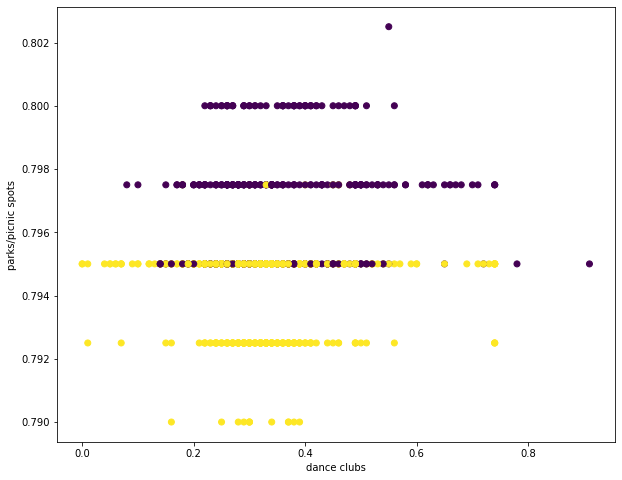

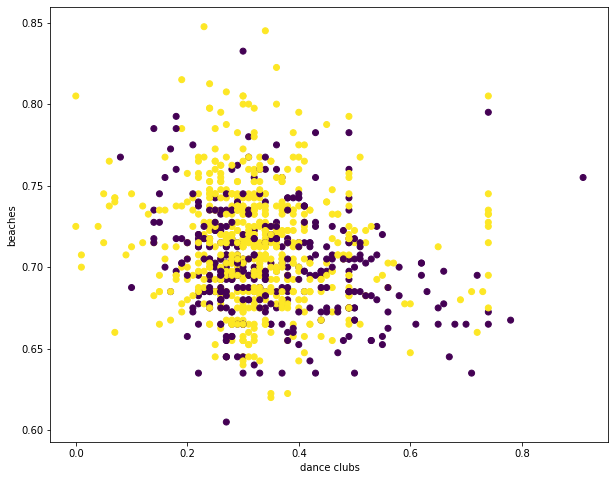

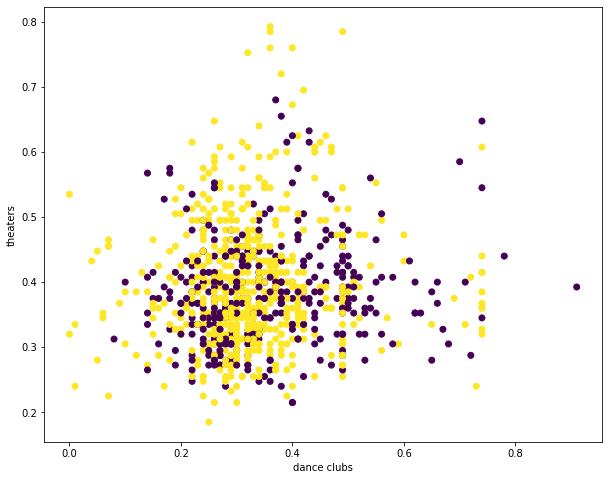

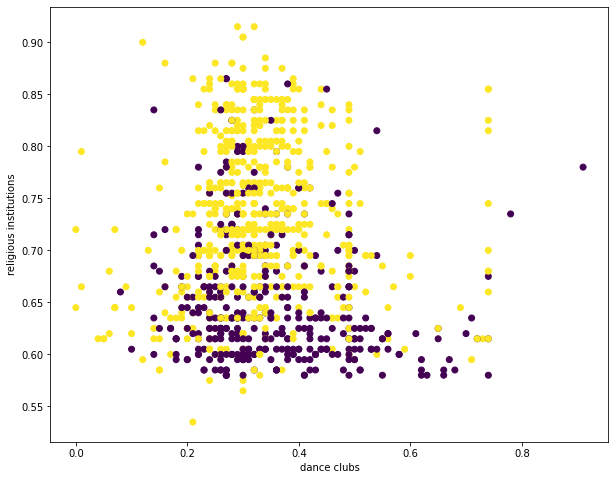

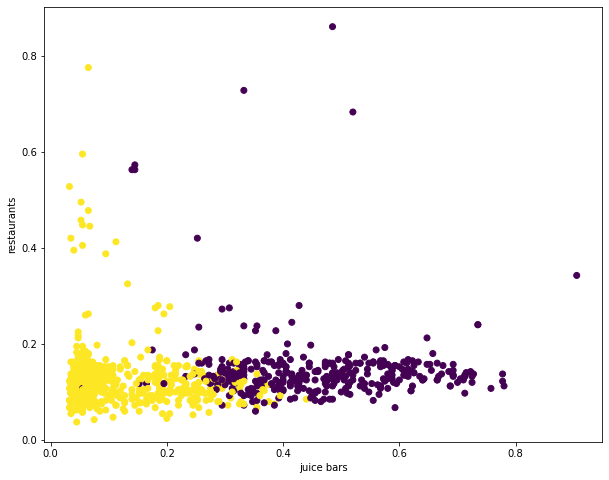

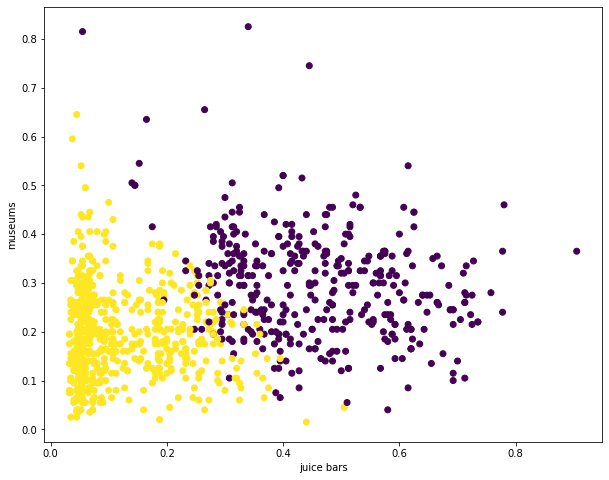

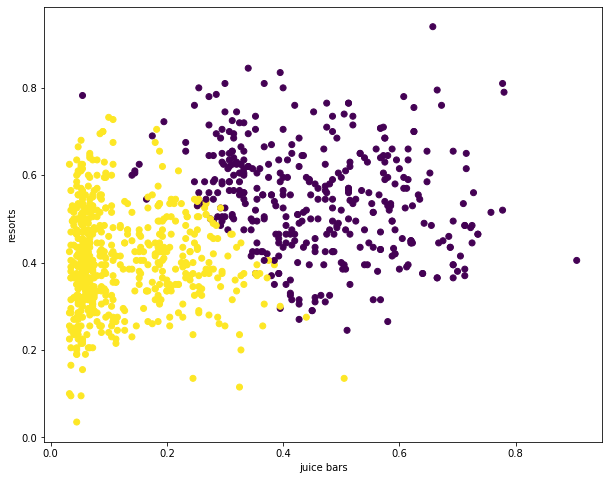

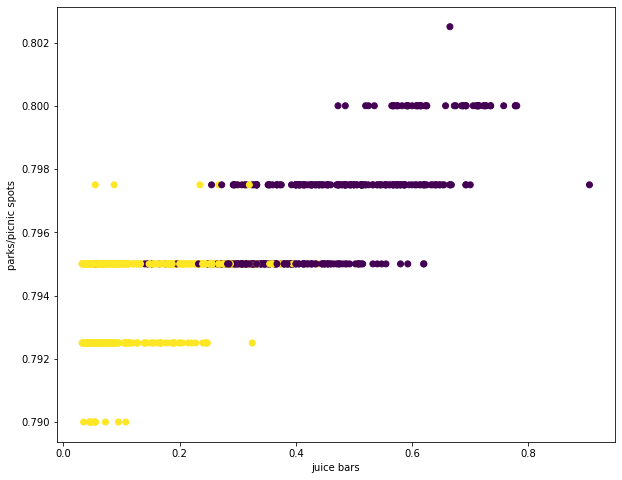

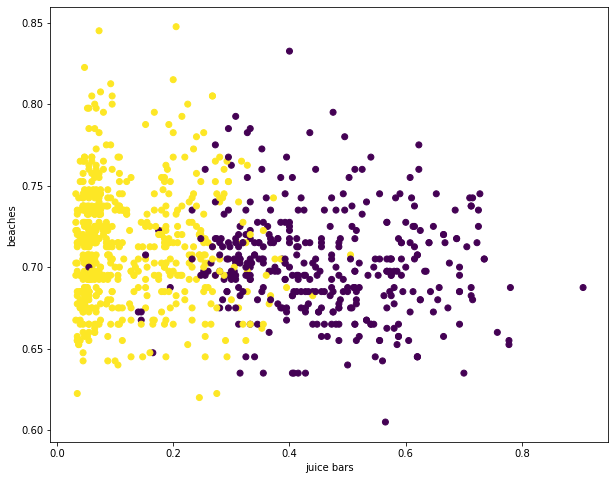

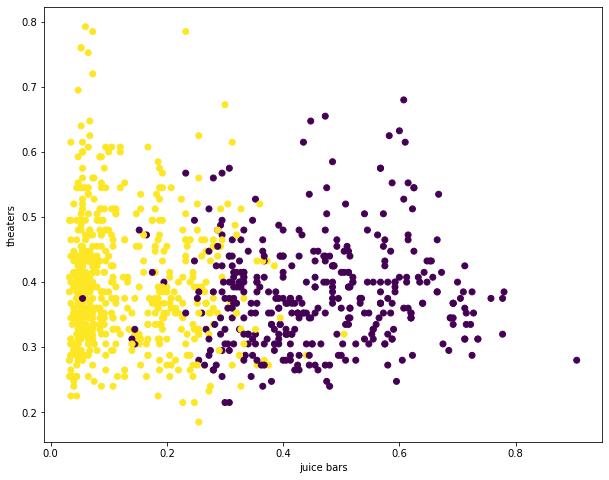

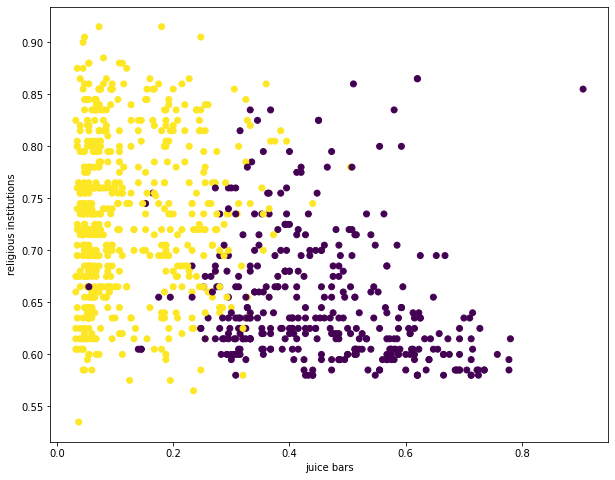

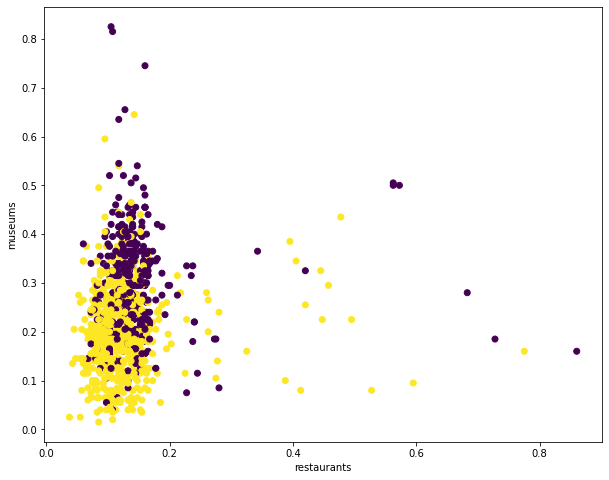

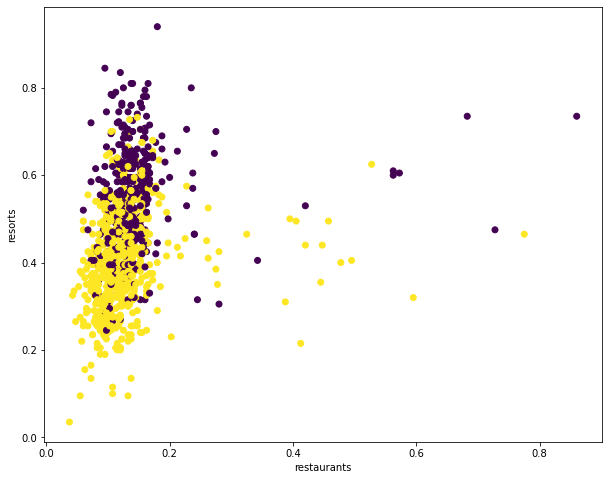

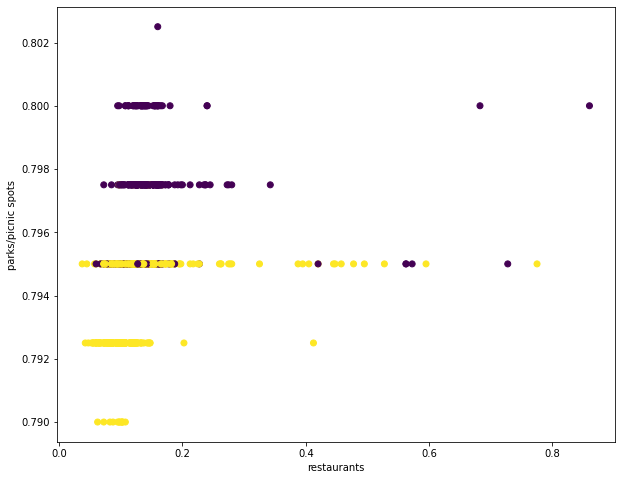

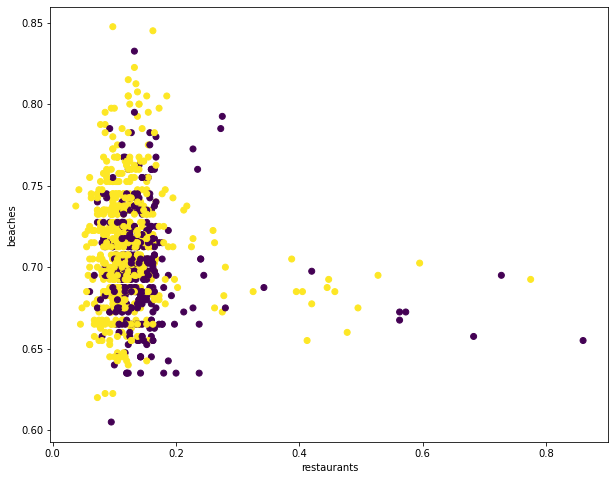

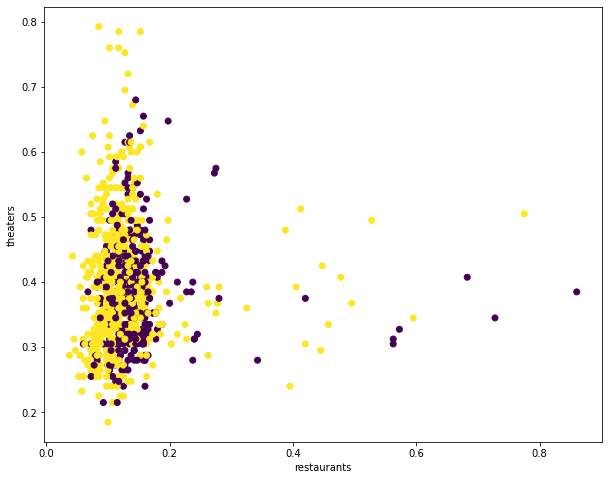

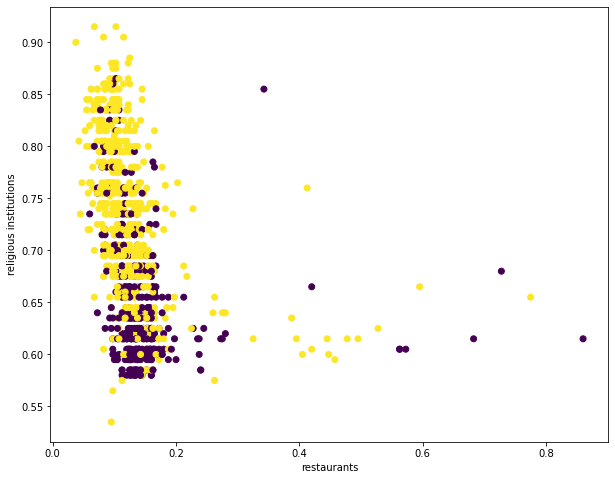

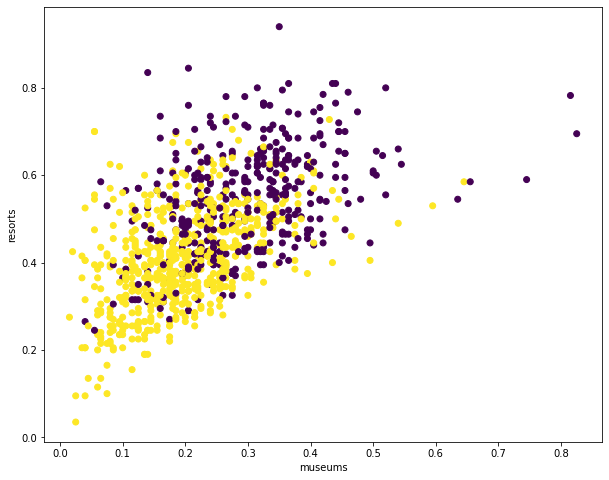

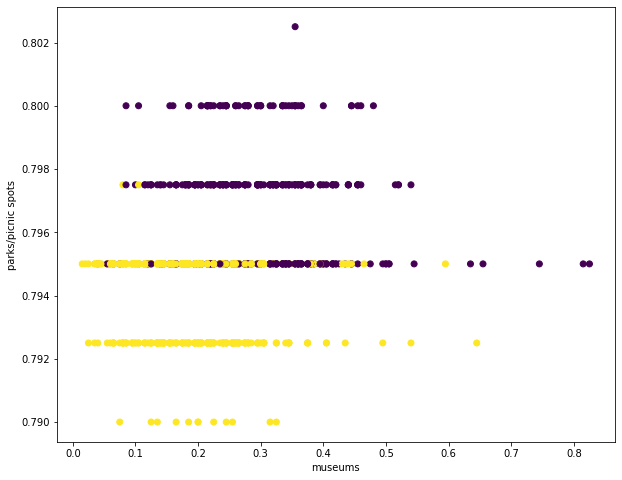

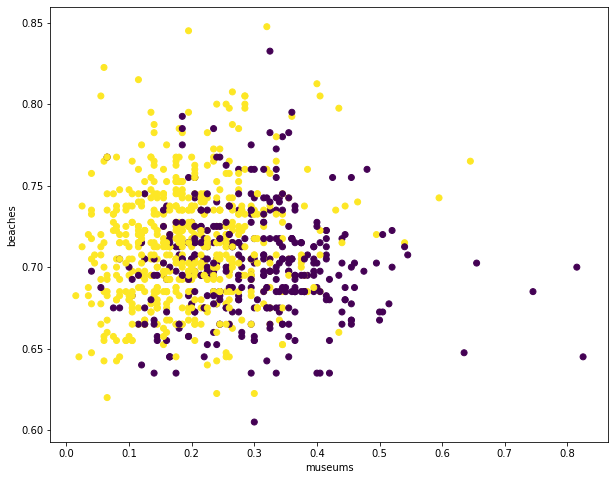

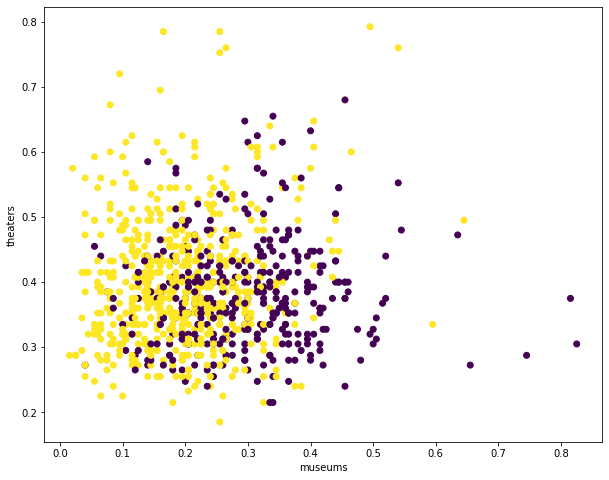

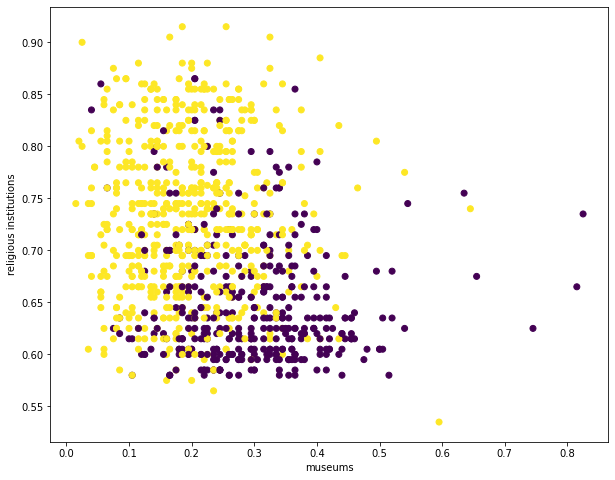

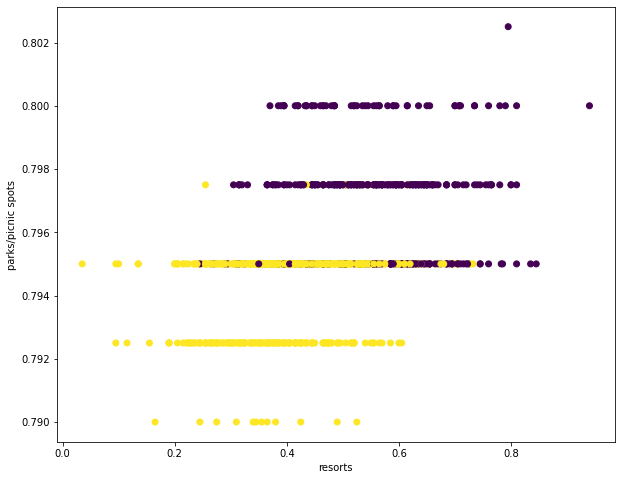

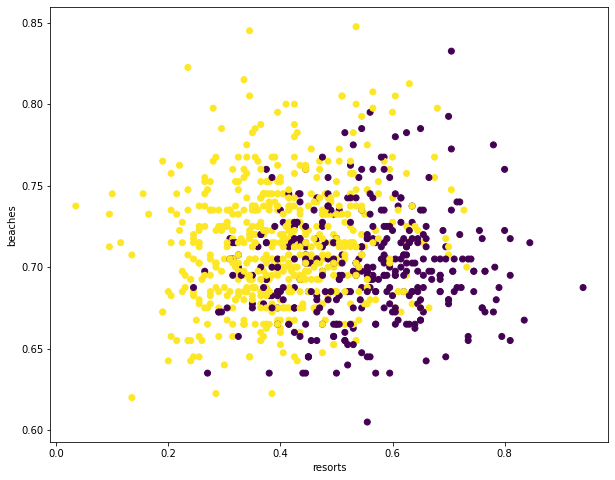

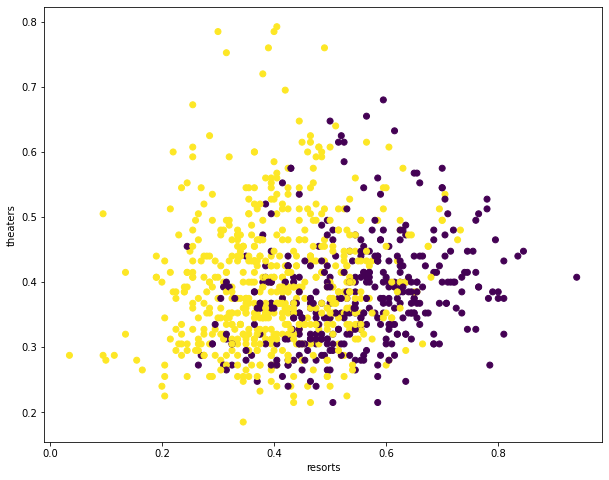

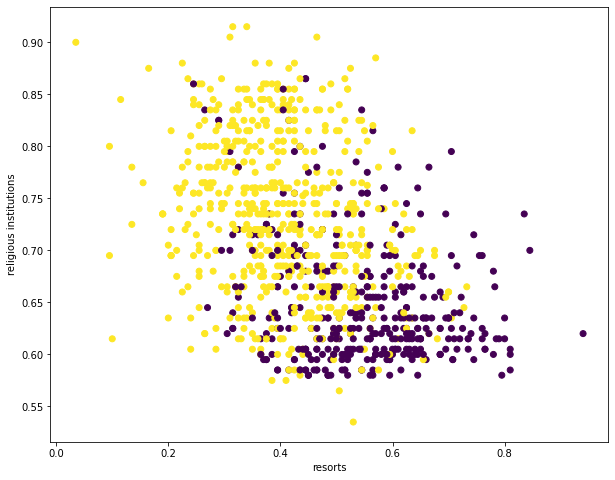

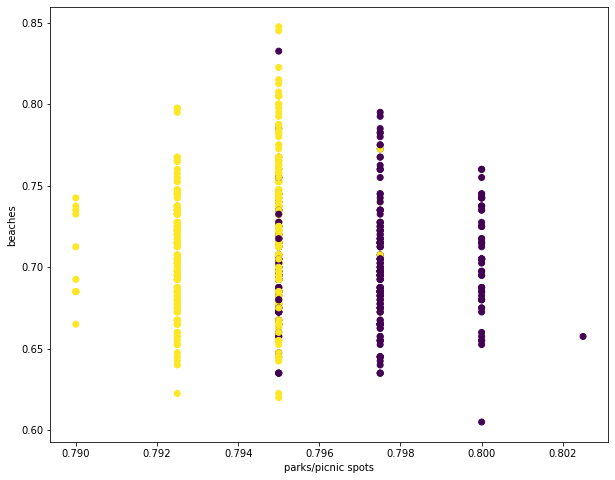

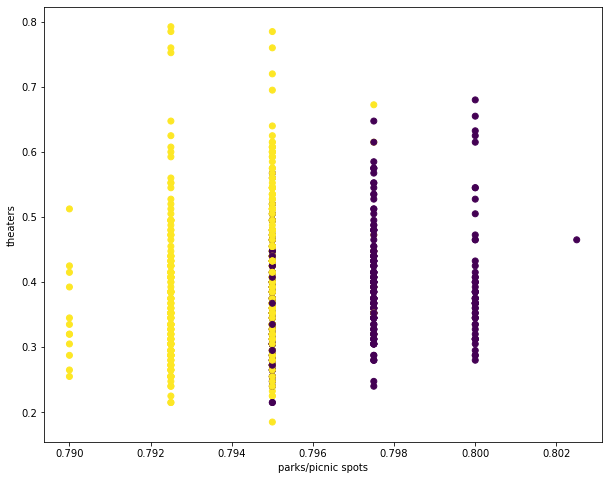

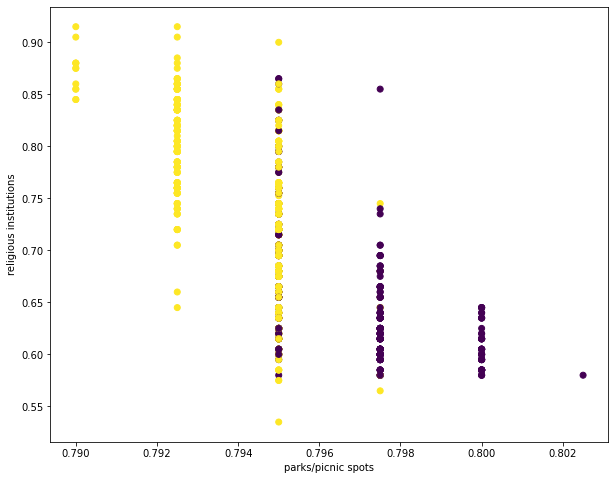

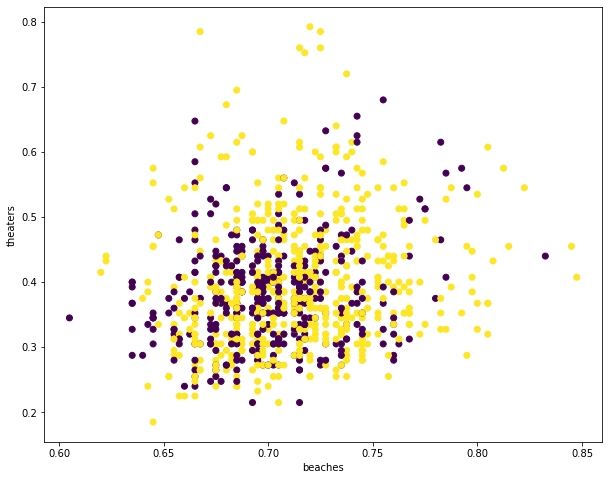

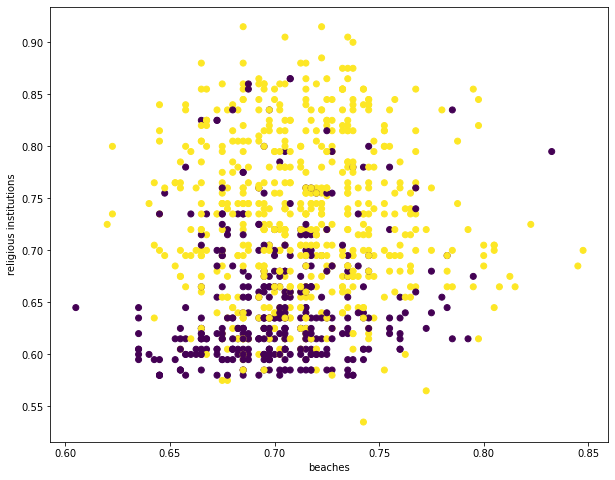

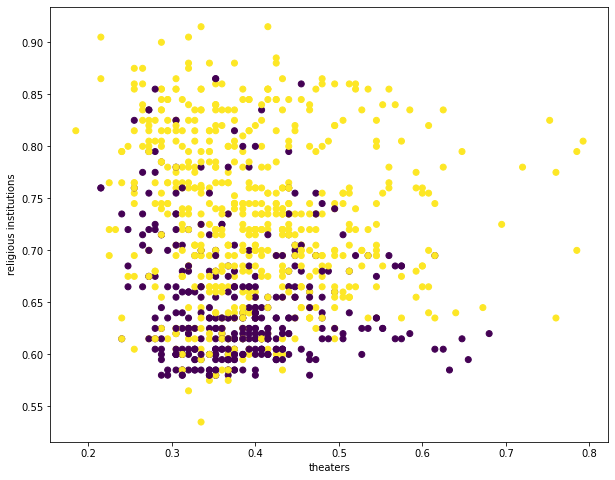

In [ ]:
def plot_kmeans1(dfclean,titles,labels):
    for k in range(len(titles)):
      for i in range(k+1,len(titles)):
        fig,ax = plt.subplots(1,1)
        ax.scatter(dfclean[titles[k]],dfclean[titles[i]],c=labels)
        ax.set_xlabel(titles[k])
        ax.set_ylabel(titles[i])
kmeanslab=resultat.labels_
plot_kmeans1(dfclean,titles,labels)

Il était d'analyser tous ces graphes. Mais nous avons remarqué que la variable tranchante était juice bars.
Nous avons cherché à réduire les dimensions avec la PCA

# PCA

L'ACP peut aussi être utilisée pour avoir une meilleure visualisation des clusters comparée aux figures précédentes, et ceci en prenant les deux premières composantes

In [ ]:
x = df.loc[:,titles ].values

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(sum(pca.explained_variance_ratio_))

0.4240298374601685


Ces deux variables expliquent 42% de l'information.

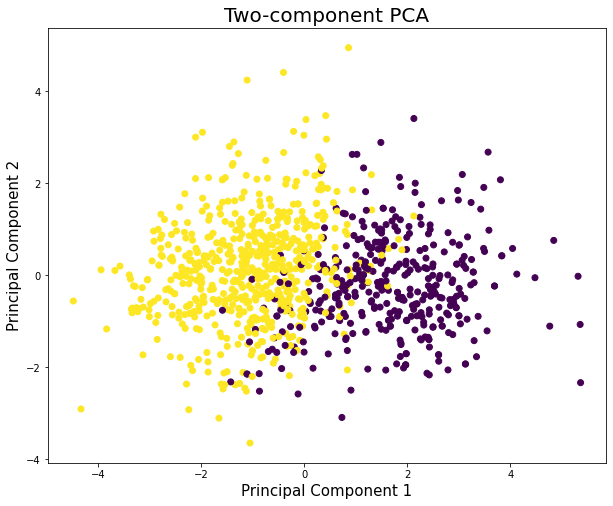

['art galleries', 'dance clubs', 'juice bars', 'restaurants', 'museums', 'resorts', 'parks/picnic spots', 'beaches', 'theaters', 'religious institutions']
[[-0.01533238  0.12965685  0.42881276  0.22864226  0.32181751  0.41744888
   0.49573266 -0.10481328  0.03977775 -0.4589633 ]
 [-0.31907527  0.29722301 -0.28305662 -0.01897704  0.34565736  0.24905167
  -0.14264171  0.41966084  0.58584628  0.09046983]]


In [ ]:
fig, ax = plt.subplots()
ax.scatter(principalComponents[:,0],principalComponents[:,1],c=kmeanslab)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two-component PCA', fontsize = 20)
plt.show()
print(titles)
print(pca.components_)

Néanmoins elles permettent d'avoir un meilleur split des deux groupes. Pour mieux comprendre les résultats par rapport aux données initiales, nous avons comparer les variables contre les pcas

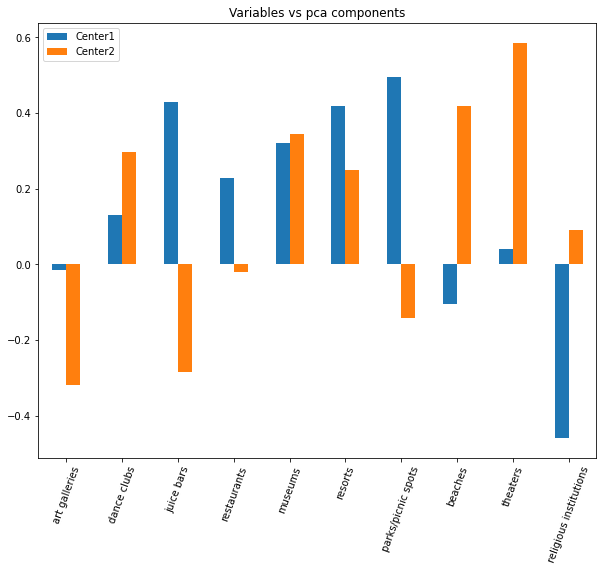

In [ ]:
# Transform centeers into python dictionary
d = {'Center1':pca.components_[0], 'Center2': pca.components_[1]}
# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=d, index=titles);
# Draw a vertical bar chart
dataFrame.plot.bar(rot=70, title="Variables vs pca components");

On revoit que le juice bars,  religious institutions, beaches et parks séparent les deux groupes. L'analyse est donc complète pour cet algorithme Kmeans nous passons au deuxième algorithme de clustering.

# Les méthodes hiérarchiques

**Le deuxième algoritme est Les méthodes hiérarchiques:**

Les méthodes de clustering de type hiérarchique forment pas à pas des connexions en utilisant une matrice de distance.

En pratique, on part des n individus en tant que singletons et on fait la connexion entre les deux individus les plus proches.

Pour débuter la deuxième étape, il faut mettre à jour la matrice des distances en enlevant une case, à cause du regroupement de deux individus. Mais comment calculer la distance d’un ensemble à un autre s’il n’est pas un singleton ? C’est justement un des choix à effectuer au départ : la stratégie d’agrégation. Il y en a de multiples, les plus simples étant de choisir la distance minimale entre les individus des deux groupes (single linkage), maximale (complete linkage) ou bien moyenne (average linkage).

A la fin de cette deuxième étape, on connecte donc les deux groupes les plus proches. Et ainsi de suite pour les étapes suivantes, jusqu’à connecter les deux derniers groupes qui recouvrent tous les individus.

Les connexions successives forment un dendrogramme. La distance associée à chaque connexion se trouve sur l’axe y de celui-ci.



source : https://larevueia.fr/clustering-les-3-methodes-a-connaitre/


On commence par réaliser le dendogramme pour différentes distances

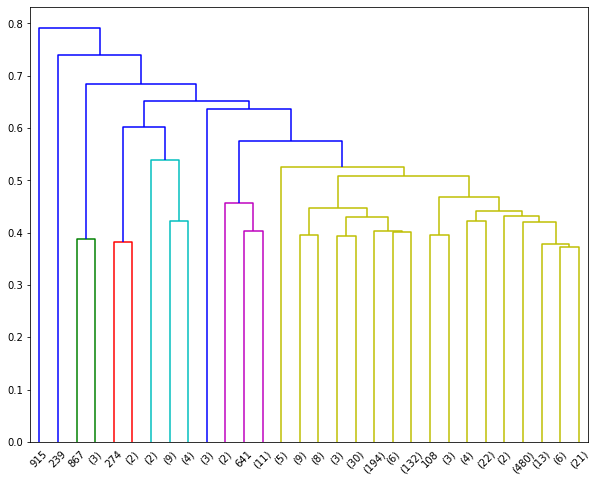

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
cluster_dist_average=linkage(dfclean,'average','euclidean')
dfaverage=dendrogram(cluster_dist_average,truncate_mode='lastp')

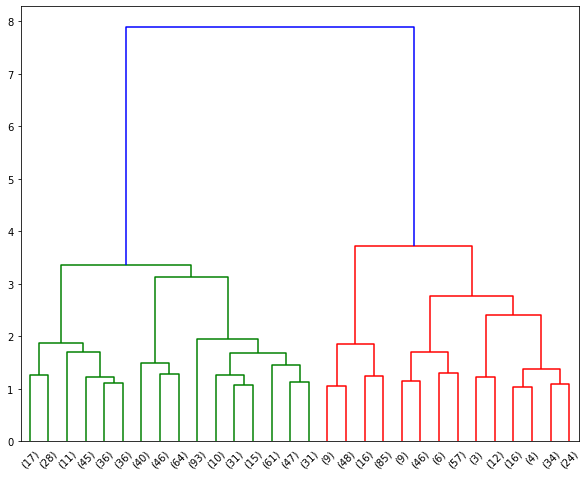

In [ ]:
cluster_dist_ward=linkage(dfclean,'ward','euclidean')
dfward=dendrogram(cluster_dist_ward,truncate_mode='lastp')

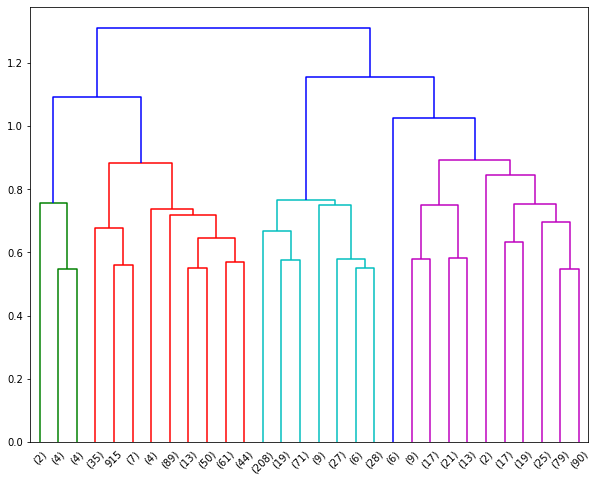

In [ ]:
cluster_dist_compl=linkage(dfclean,'complete','euclidean')
dfcentr=dendrogram(cluster_dist_compl,truncate_mode='lastp')

Voyant que nous ne pouvons pas tirer beaucoup d'informations, nous avons décidé de réaliser un heat map comme ci-dessous, pour une meilleure visualisation et compréhension

source  code :https://python-graph-gallery.com/404-dendrogram-with-heat-map

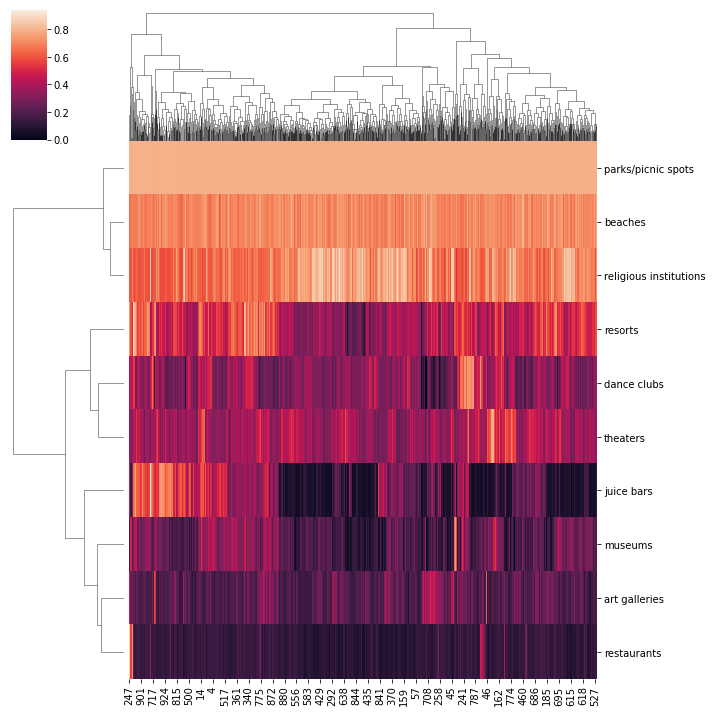

In [ ]:
cg=sns.clustermap(dfclean.transpose(), metric="euclidean",method="complete")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()


**Dendogramme heatmap**


Contrairement aux kmeans, la méthode clustering hierarchique regroupe aussi les variables et pas seulement les points.

***Verticalement***

En haut, on a tous les activités que les gens ont apprécié le plus: parks, beaches, religious
En bas les moins aimés: restaurant, art , musées, juice.
Au milieu on a resorts, dance clubs et theatres.

***Horizontalement***

Aussi au niveau des points. Nous voyons les outliers qui aiment les restaurants. A gauche les gens qui aiment les juice bars et à droite ceux qui aiment moins.

Bien qu'illustratif, nous avons toujours besoin de choisir un nombre de clusters et de définir les labels comme dans kmeans



**Extraction des clusters du dendogramme**


Bien qu'illustratif, nous avons toujours besoin de choisir un nombre de clusters et de définir les labels comme dans kmeans


Le choix de nombre de cluster n’est pas unique : on peut en vouloir un nombre précis, ou bien fixer un critère de distance inter-classe. On utilise le dendrogramme pour mettre les clusters en évidence.

Nous avons choisi 3 groupes. Pour les extraire nous avons creusé le résultat donné par dendogramme. 

La variable associée dfiv donne le nombre de points dans chaque cluster

In [ ]:
dfd=dendrogram(cluster_dist_compl,truncate_mode='lastp',p=3,no_plot=True)
print(dfd)
print(dfd["ivl"])
dfiv=[314,368,298]
#plot_kmeans1(dfevaldend, titles,dfevaldend["labels"])

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]], 'dcoord': [[0.0, 1.1573353014576198, 1.1573353014576198, 0.0], [0.0, 1.311968940181131, 1.311968940181131, 1.1573353014576198]], 'ivl': ['(314)', '(368)', '(298)'], 'leaves': [1956, 1951, 1955], 'color_list': ['b', 'b']}
['(314)', '(368)', '(298)']


La variable dfleaves donne les points et va dans l'odre croissant. Premier n points appartiennent au premier cluster, etc. Ceci nous a permis de définir comme avec kmeans les labels de chaque point

In [ ]:
print(dfiv)
dfd=dendrogram(cluster_dist_compl,truncate_mode='lastp',p=980,no_plot=True)
dfleaves=dfd["leaves"]
dfgroup=[]
k=0
for i in range(len(dfiv)):
  for j in range(dfiv[i]):
    dfgroup.append(k)
  k+=1

[314, 368, 298]


Nous avons ensuite ajouté ces labels à une nouvelle dataframe avec les x les titles et y le nouveau label

In [ ]:
dfevaldend=dfclean.copy()
dfevaldend=dfevaldend.assign(labels=0)
for i in range(len(dfleaves)):
  ind=dfleaves[i]
  dfevaldend.at[ind,"labels"]=dfgroup[i]

On a ensuite réalisé la PCA directement pour une visualisation des trois groupes

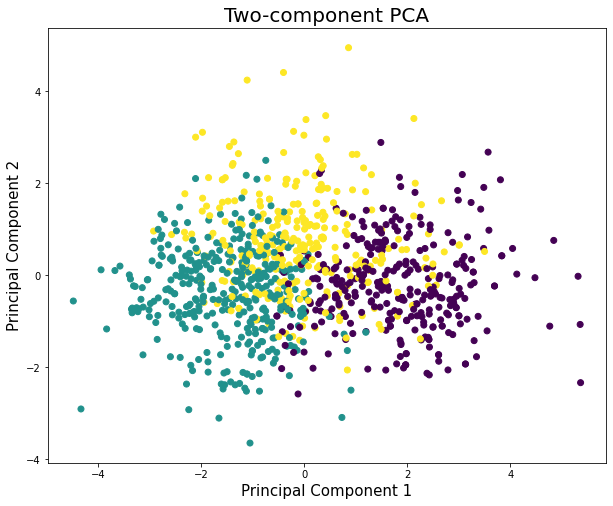

0.4240298374601684
['art galleries', 'dance clubs', 'juice bars', 'restaurants', 'museums', 'resorts', 'parks/picnic spots', 'beaches', 'theaters', 'religious institutions']
[[-0.01533238  0.12965685  0.42881276  0.22864226  0.32181751  0.41744888
   0.49573266 -0.10481328  0.03977775 -0.4589633 ]
 [-0.31907527  0.29722301 -0.28305662 -0.01897704  0.34565736  0.24905167
  -0.14264171  0.41966084  0.58584628  0.09046983]]


In [ ]:
x = df.loc[:,titles ].values
n=2
pcahr = PCA(n_components=n)
x = StandardScaler().fit_transform(x)
principalComponents = pcahr.fit_transform(x)
fig, ax = plt.subplots()
ax.scatter(principalComponents[:,0],principalComponents[:,1],c=dfevaldend["labels"])
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two-component PCA', fontsize = 20)
plt.show()
print(sum(pcahr.explained_variance_ratio_))
print(titles)
print(pcahr.components_)

On voit nos trois groupes à gauche de PC1 le premier, à droite le deuxième et au milieu le troisième. Mais le PCA ne nous permet de différencier facilement. Nous avons utilisé une autre technique

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


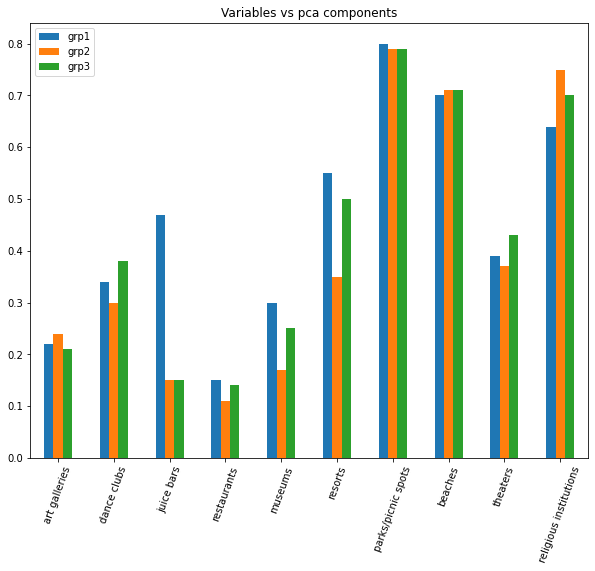

In [ ]:
df_moyen = df[dfevaldend["labels"]==0].mean(axis=0).round(2).tolist()
df_moyen1=df[dfevaldend["labels"]==1].mean(axis=0).round(2).tolist()
df_moyen2=df[dfevaldend["labels"]==2].mean(axis=0).round(2).tolist()
# Transform centeers into python dictionary
d = {'grp1':df_moyen, 'grp2': df_moyen1, 'grp3':df_moyen2}
# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=d, index=titles);
# Draw a vertical bar chart
plt.rcParams["figure.figsize"]=(10,8);
dataFrame.plot.bar(rot=70, title="Variables vs pca components");

Le premier groupe: sur et certain aime juice bars
les deux autres aiment pas
le deuxième différencie: aiment pas museums, resorts et aiment plus religious institutions.
Nous avons ici une idée de classification qui est notre prochaine étape

# Classification
Maintenant nous passons au problème de classification. Le but de la classification est d’apprendre (autrement dit de trouver) la relation qui lie une variable d’intérêt, de type qualitative, aux autres variables observées, éventuellement dans un but de prédiction.
Dans notre cas, on a utilisé les résultats du clustering afin de classifier les clients et prédire les groupes auxquels pourront appartenir les prochains clients ciblés.

Premier cas: régression logistique avec Kmeans 2 groupes

Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
import statsmodels.api as sm
import scipy
from statsmodels.api import Logit
#nous importons la fonction logistique. On pouvait aussi faire sm.logit
import math
from sklearn.model_selection import train_test_split
#
import numpy as np
Y=kmeanslab
X=dfclean[titles[0:7]]
X=sm.add_constant(X)
#alpha pourcentage de test
alpha=0.3
#beta seuil >beta le résultat est 1; plus petit le résultat est 0
beta=0.5
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=alpha)
reg_logistique=Logit(Y_train,X_train)
resultat=reg_logistique.fit()
#on compare les résultats pour les variables test
Ypredtest=resultat.predict(X_test)
#nous prédisons la valeur en me basant sur les valeurs test et sur le modèle train
pred_groupe=np.where(Ypredtest>beta,1,0)
#on crée le groupe de prédiction 0 ou 1 en fonction des valeurs >0.5 ou <0.5
crosstab=pd.crosstab(pred_groupe,Y_test)
# nous calculons la valeur de la matrice de confusion
print(crosstab)

Optimization terminated successfully.
         Current function value: 0.023624
         Iterations 18
col_0    0    1
row_0          
0      112    2
1        0  180


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
error=(crosstab[0][1]+crosstab[1][0])
tot=(crosstab[0][1]+crosstab[1][0]+crosstab[0][0]+crosstab[1][1])
print(error)
print(tot)
err=error/tot
print(err)
#nous calculons l'erreur asociée

2
294
0.006802721088435374


Nous trouvons que l'accuracy est énorme. Ceci peut montrer que çà pourrait être un problème d'overfitting. Pour les résultats de hierarchical, la régression logistique ne marche pas facilement car trois groupes. Nous passons aux arbres de décision

# Arbres de décision
Application aux résultats du clustering hierarchique 3+ groupes

In [ ]:
import statsmodels.api as sm
import scipy
from statsmodels.api import Logit
#nous importons la fonction logistique. On pouvait aussi faire sm.logit
import math
from sklearn.model_selection import train_test_split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
import numpy as np
Y=dfevaldend["labels"]
X=dfclean[titles]
alpha=0.3
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=alpha)
from sklearn import tree
from sklearn.metrics import mean_squared_error,accuracy_score
clf = tree.DecisionTreeClassifier();
clf = clf.fit(X_train,Y_train);
Y_pred=clf.predict(X_test);
clf.predict_proba(X_test);
print(mean_squared_error(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

0.3129251700680272
0.8299319727891157


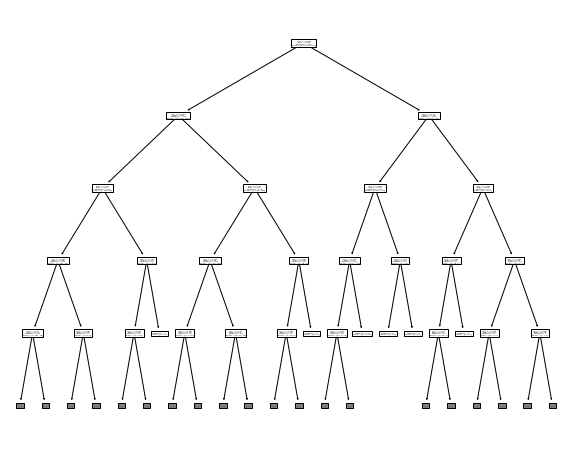

In [ ]:
tree.plot_tree(clf,max_depth=4);

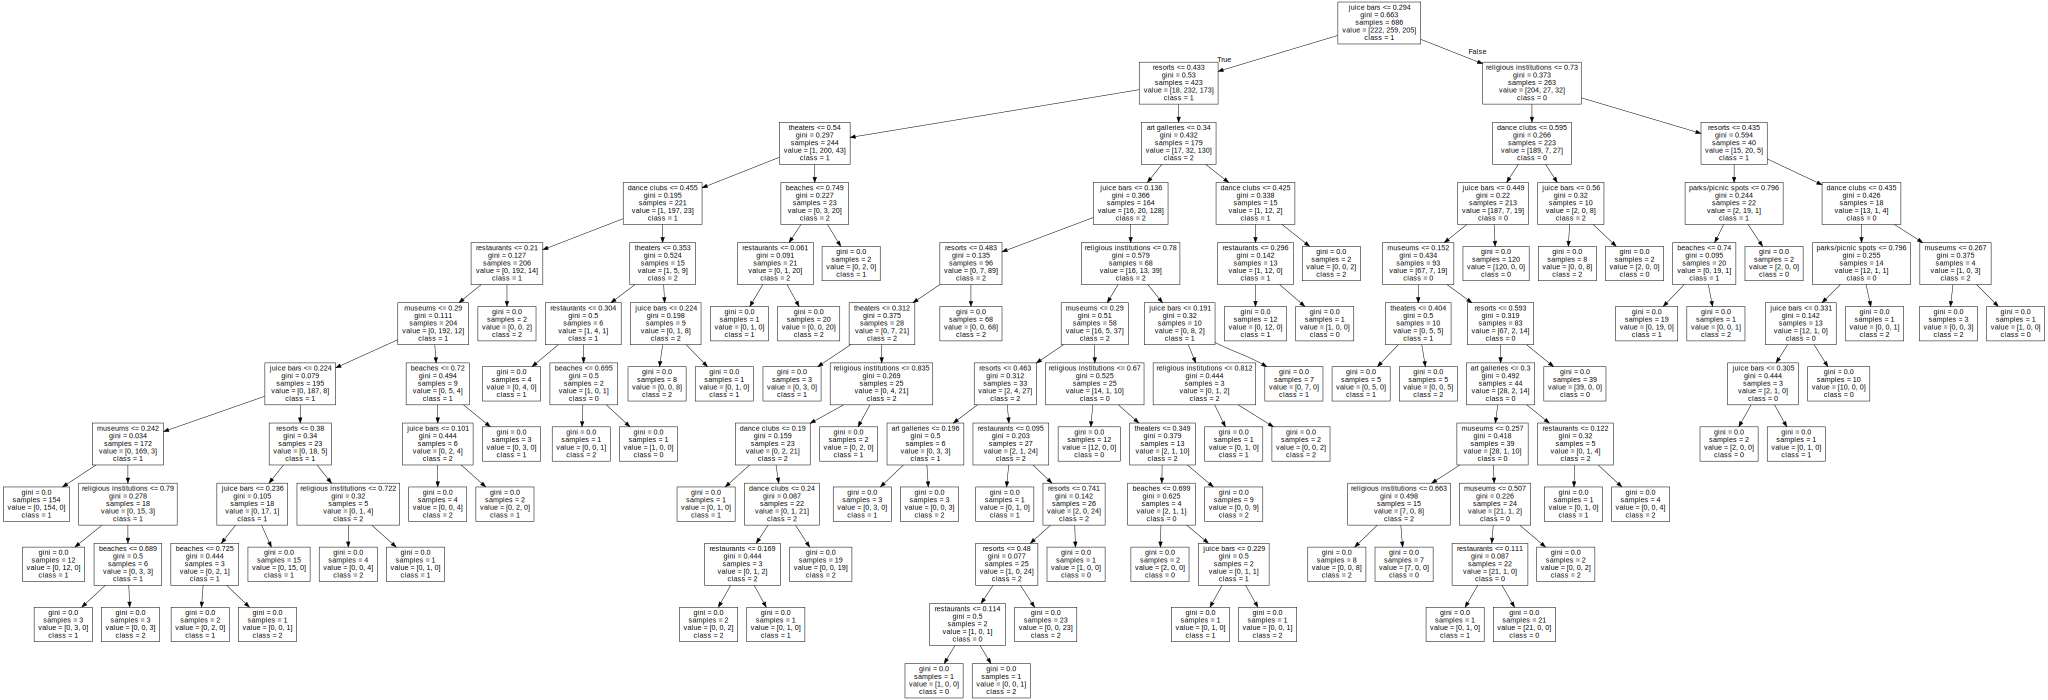

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=titles,  
                                class_names=["0","1","2","3"])

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Nous visualisons ici la table de décision réduite à un depth de 3 afin de mieux visualiser.
Nous allons faire un petit parcours.
Si il aime juice bars, il est à droite. s'il aime religious institutions à  droite. s'il aime resorts  à droite. On a qu'il appartient au groupe 0 avec 80% de chance.
sil n'aime pas resorts il est dans groupe 1 à 92%. On pourra continuer cela pour tous, et aussi pour une profondeur plus grande.

# Prédiction:

Notre dernière étape est d'utiliser les résultats de notre travail afin de prédire la classe à laquelle le prochain client pourra appartenir.
Nous avons donc introduit un nouveau client avec des préférences et nous avons pus prédit ces préférences

In [ ]:
X_new=pd.DataFrame([0.4,0.6,0.2,0.8,0.2,0.6,0.2,0.8,0.3,0.6])
dff=pd.DataFrame([0.2,0.4,0.6,0.7,0.8,0.6,0.8,0.1,0.5,0.1],titles)
X_new=X_new.transpose()
print(dff)
print(clf.predict(X_new))

                          0
art galleries           0.2
dance clubs             0.4
juice bars              0.6
restaurants             0.7
museums                 0.8
resorts                 0.6
parks/picnic spots      0.8
beaches                 0.1
theaters                0.5
religious institutions  0.1
[2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Conclusion:

Ce travail nous a permis d'appliquer les algorithmes d'exploration, visualisation, clustering, classification et prédiction des données. Il est d'une importance primordiale dans un monde où le retour client est important pour le ciblage des opérations et où l'interconnection entre clients qui partagent les mêmes centres d'intérêt.